# Aufgabenblatt 2: Approximation von Funktionen

## Schritt 1: Installieren

In [182]:
# using Pkg
# Pkg.add(url="https://github.com/matthiasbaitsch/mmjmesh.git")
# Pkg.add("CairoMakie")
# Pkg.add("IntervalSets")

using CairoMakie
using IntervalSets
using MMJMesh.Plots
using MMJMesh.Mathematics

## Schritt 2: Funktionen approximieren

### Funktionen

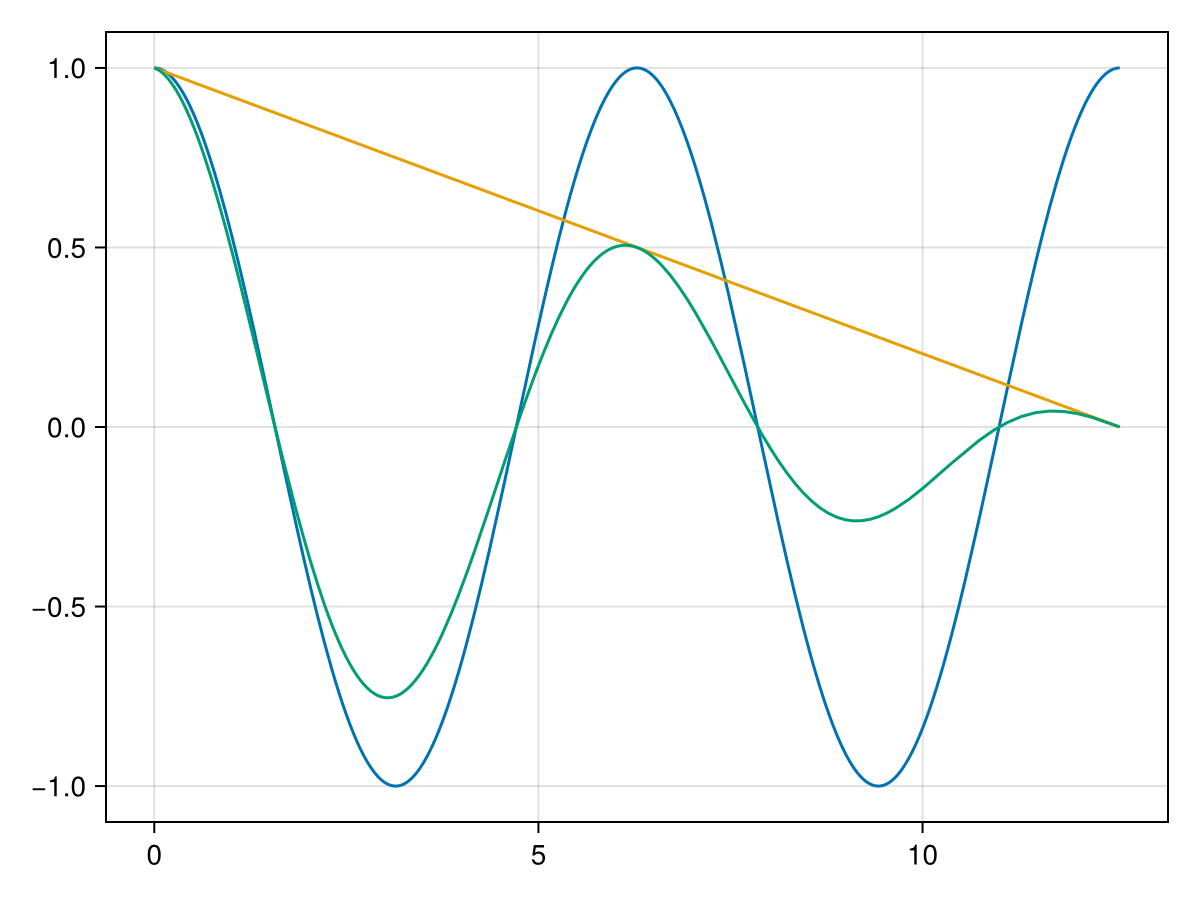

In [183]:
f = Cos(0 .. 4π)
g = Polynomial([1, -1 / (4π)], 0 .. 4π)
h = f * g

fplot(f, g, h)

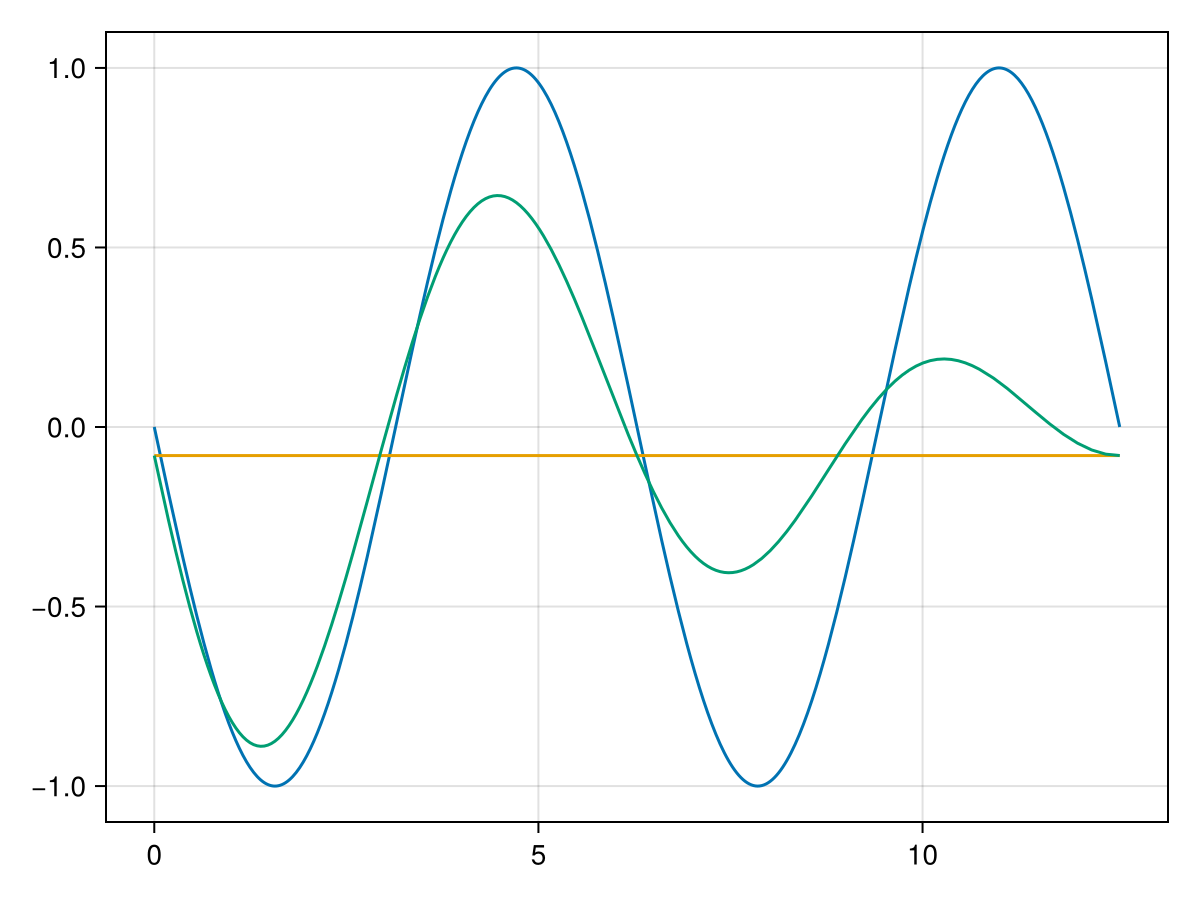

In [184]:
fplot(f', g', h')

### Funktionswerte

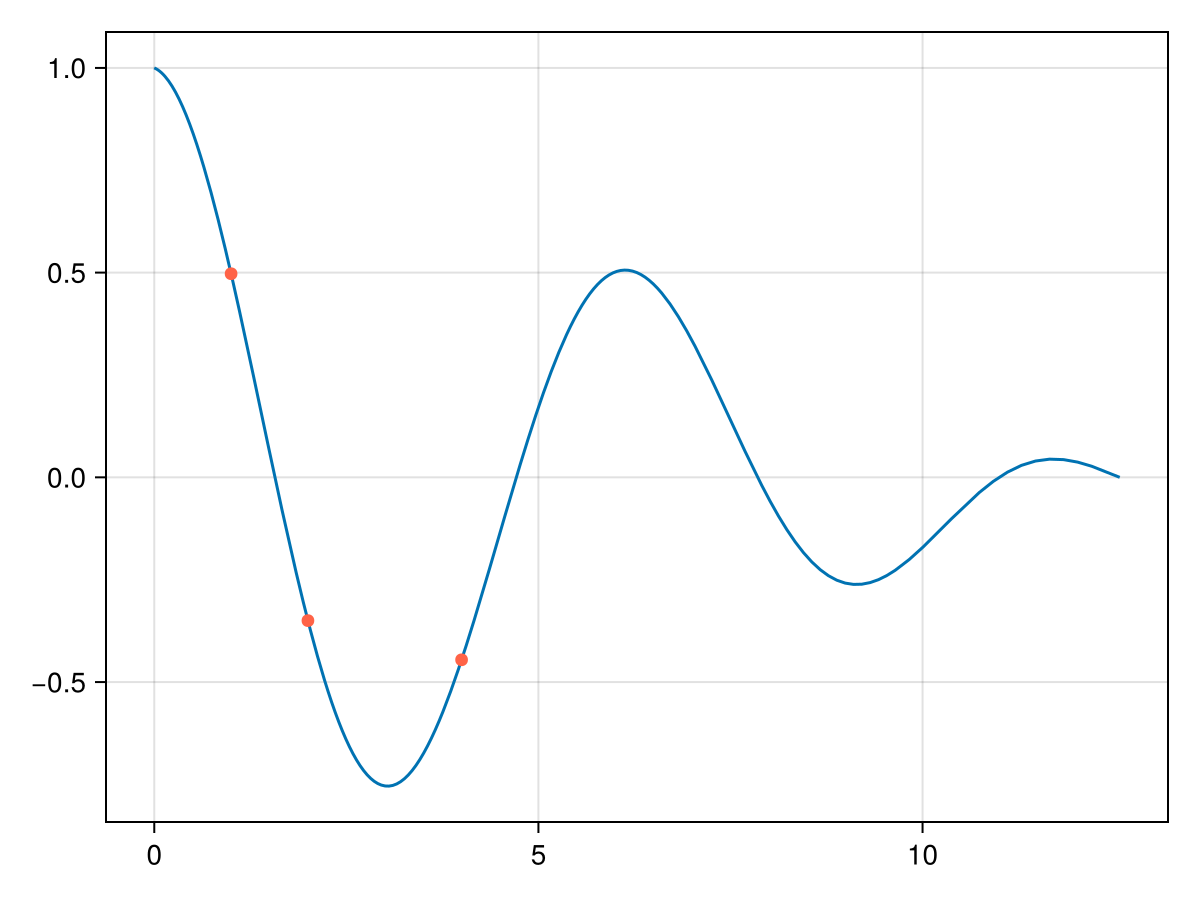

In [185]:
xx = [1, 3, 7]
y = h.(x)
p = fplot(h)
scatter!(x, y, color = :tomato)
p

### Basisfunktionen

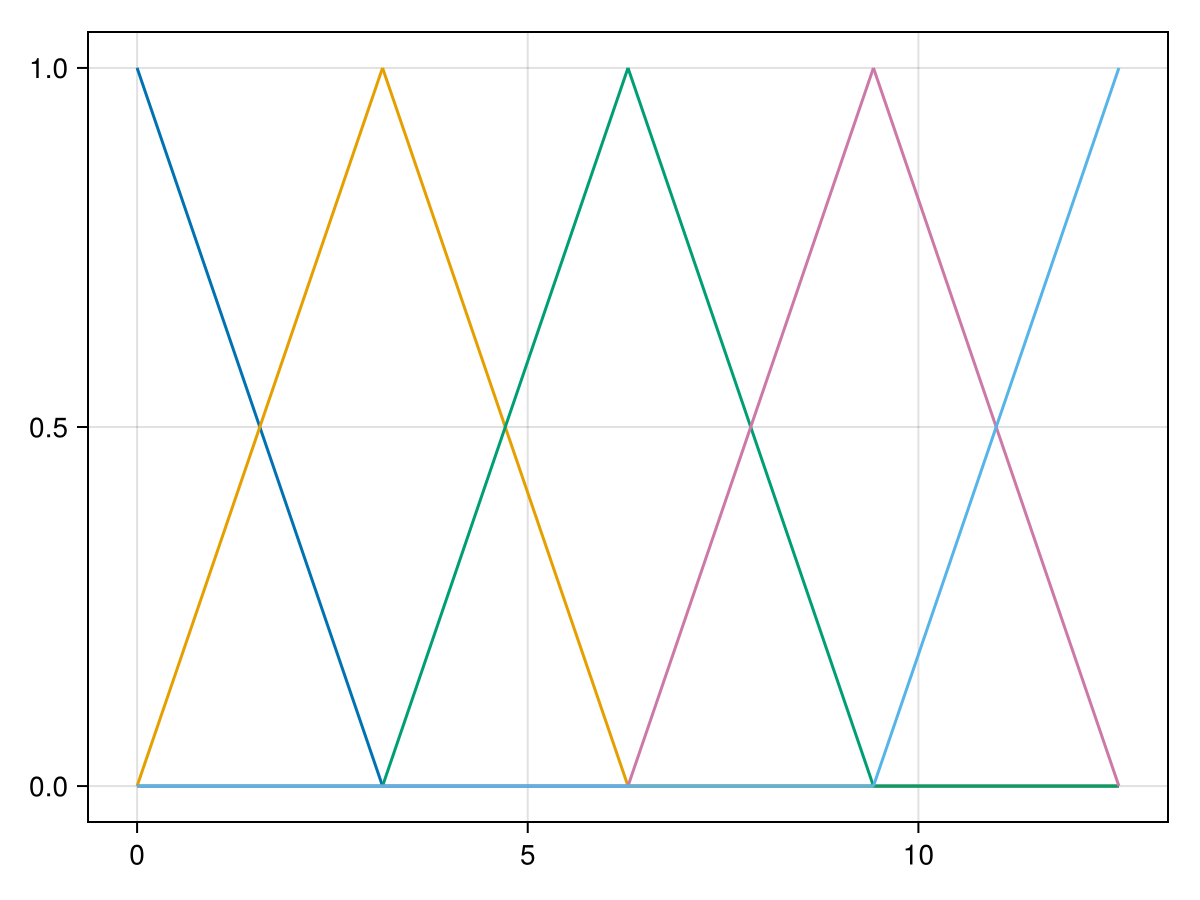

In [186]:
nodes = range(0, 4π, 5)
phis = hatfunctions(nodes)
fplot(phis)

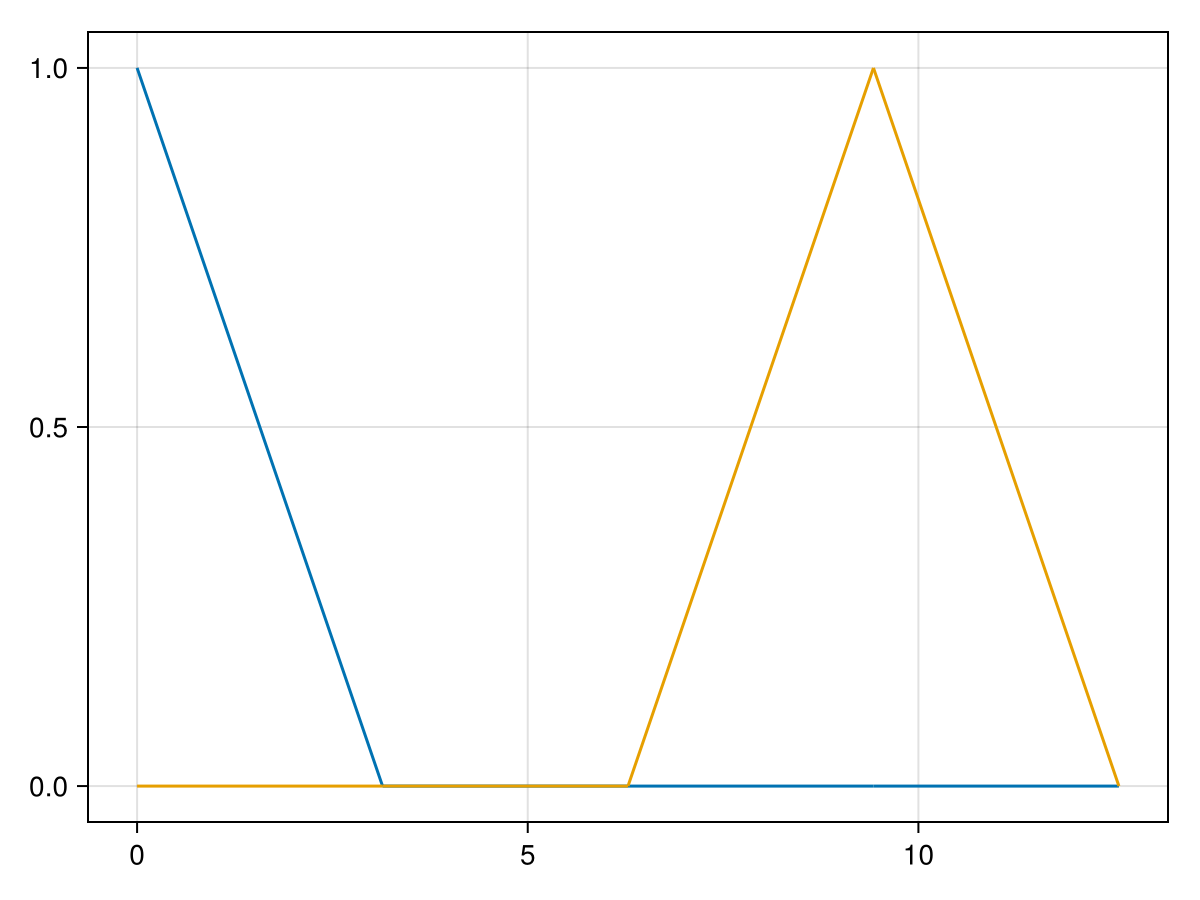

In [187]:
fplot(phis[1], phis[4])

### Linearkombination

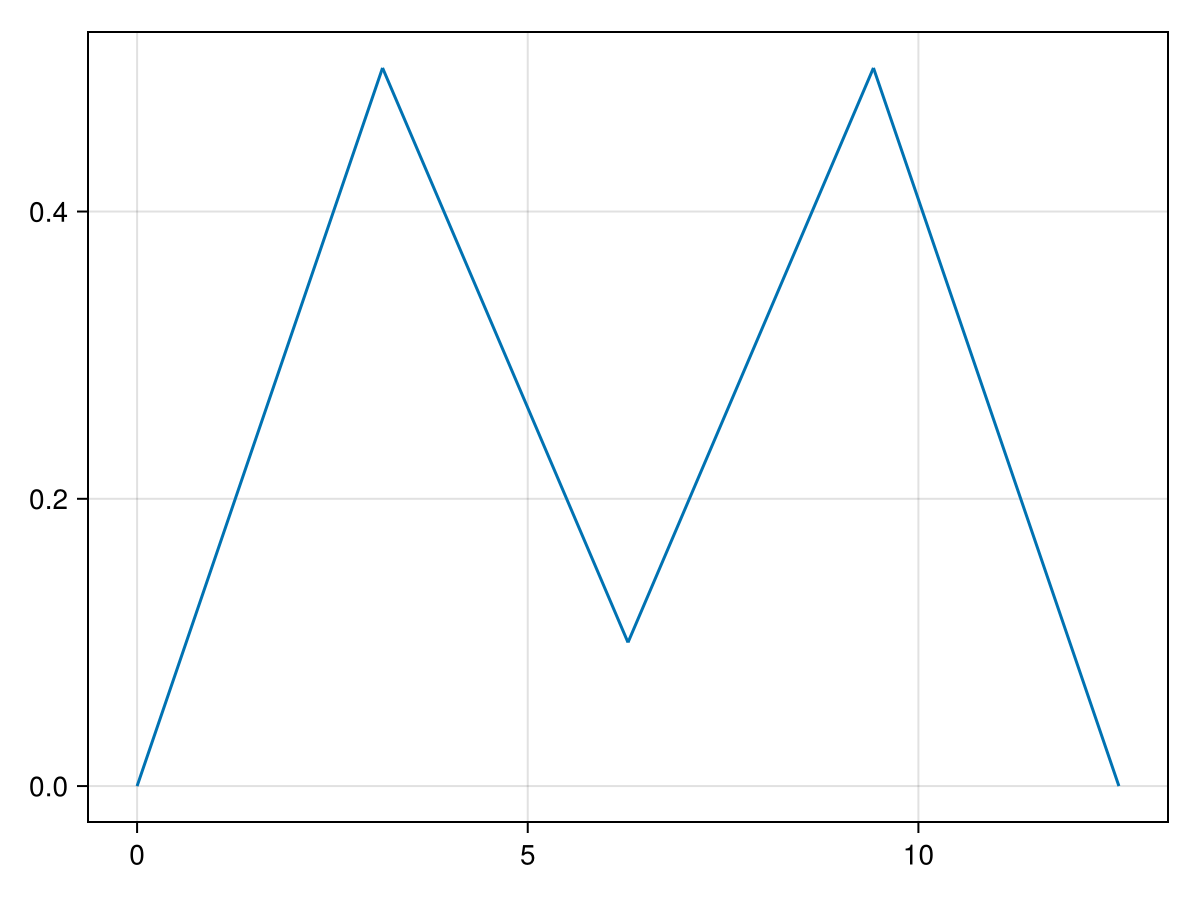

In [188]:
uHat = [0, 0.5, 0.1, 0.5, 0]
u = sum(uHat .* phis)

fplot(uu)

### Approximation

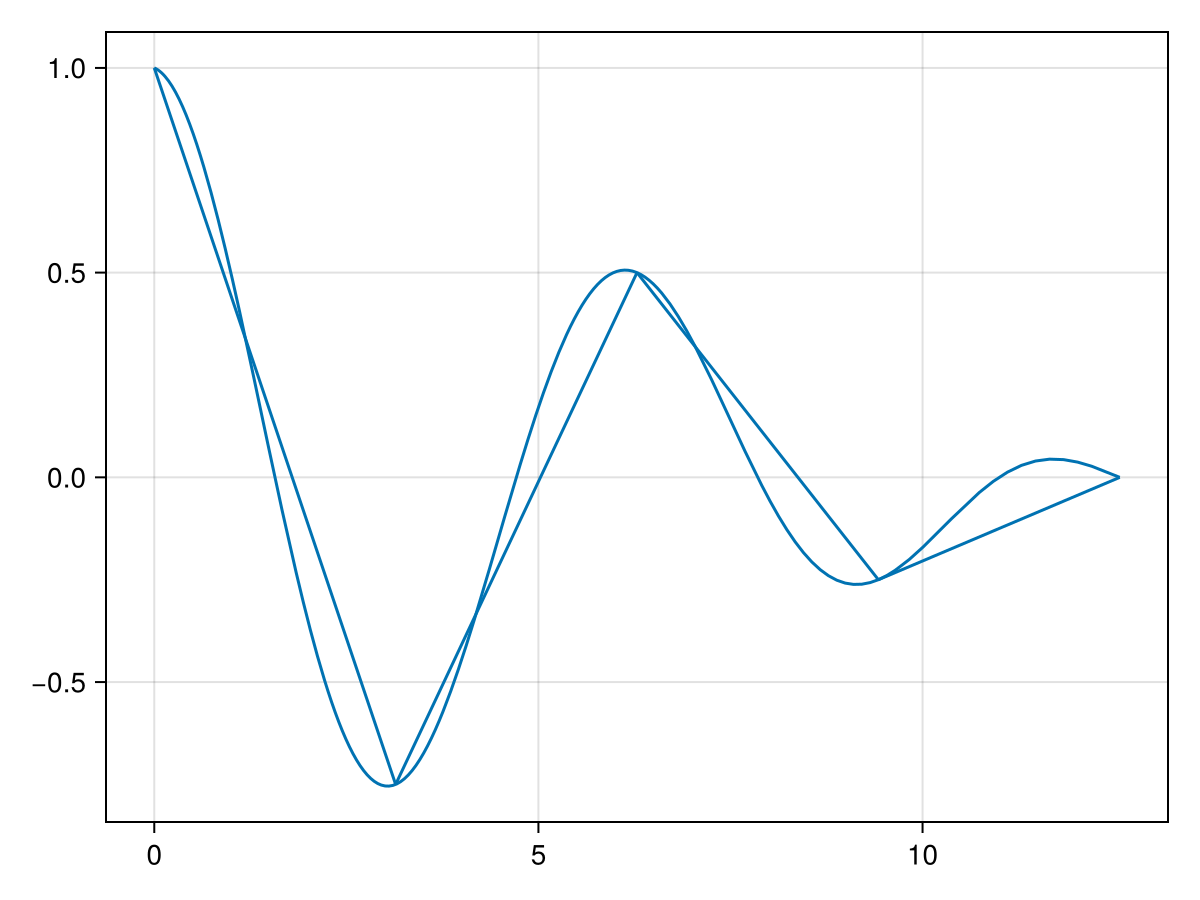

In [189]:
ha = sum(h.(nodes) .* phis)
fplot(ha, h)

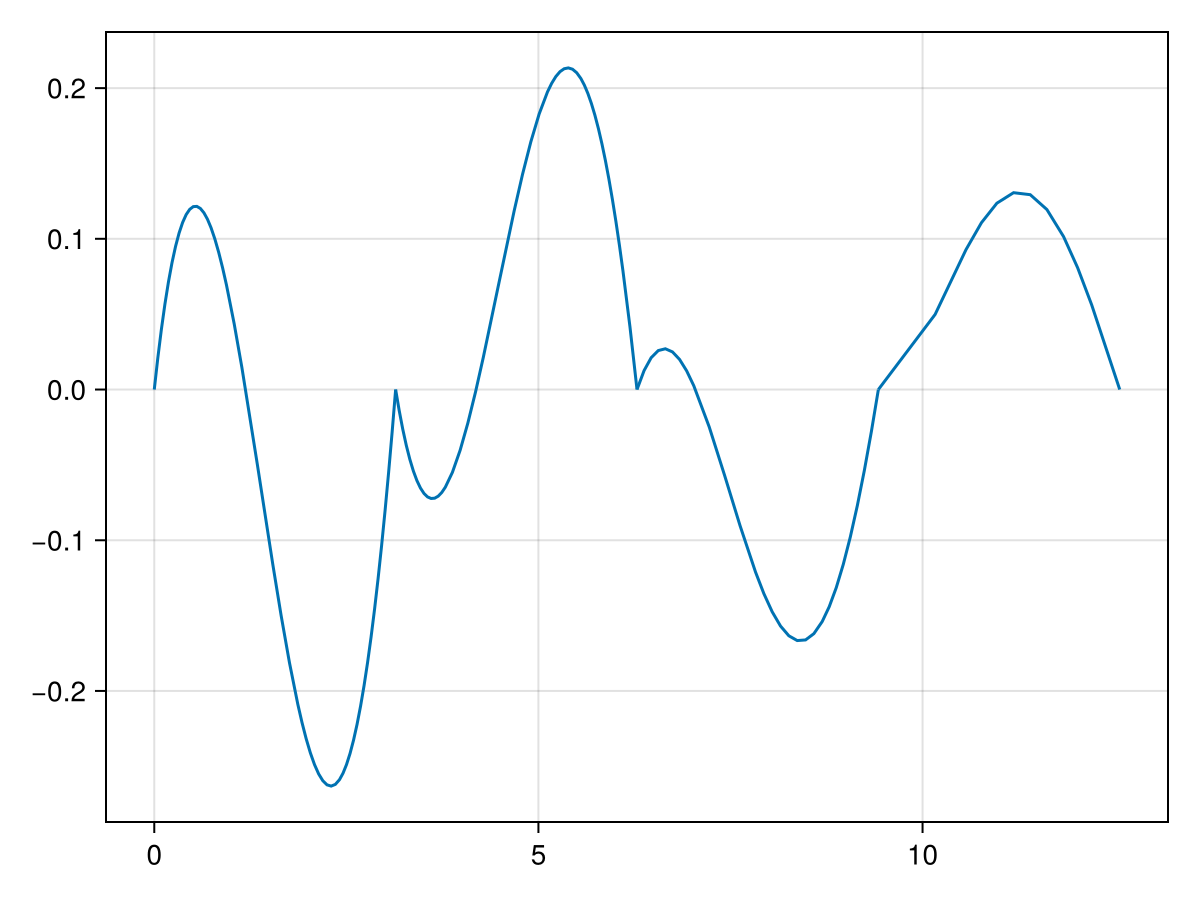

In [190]:
e = h - ha
fplot(e)

### Norm

In [191]:
maxnorm(u) = maximum(abs.(u.(range(domain(u), 1000))))

maxnorm(e)

0.26312853915228945

### Konvergenz

In [192]:
function error(Ne)
    nodes = range(0, 4π, Ne + 1)
    phis = hatfunctions(nodes)
    ha = sum(h.(nodes) .* phis)
    return maxnorm(h - ha)
end

error(2)
#error(4)

1.5165767133530554

In [193]:
Nes = 2 .^ (2:10)
hs = 4π ./ Nes
es = error.(Nes)

9-element Vector{Float64}:
 0.26312853915228945
 0.20072154793761887
 0.06368437138665128
 0.017949814501032835
 0.004675338187432598
 0.0011881020751056681
 0.0002991225341906212
 7.502295420513949e-5
 1.718931437044713e-5

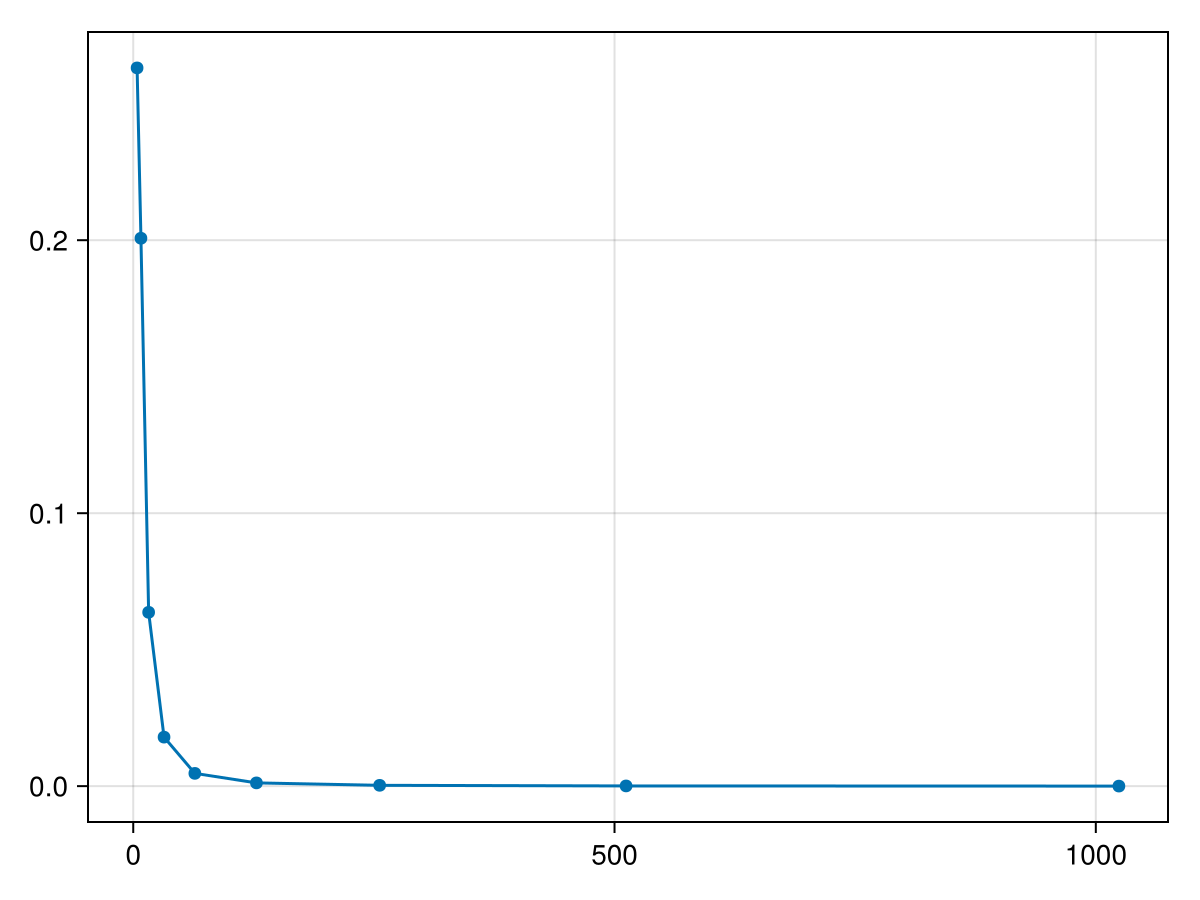

In [194]:
scatterlines(Nes, es)

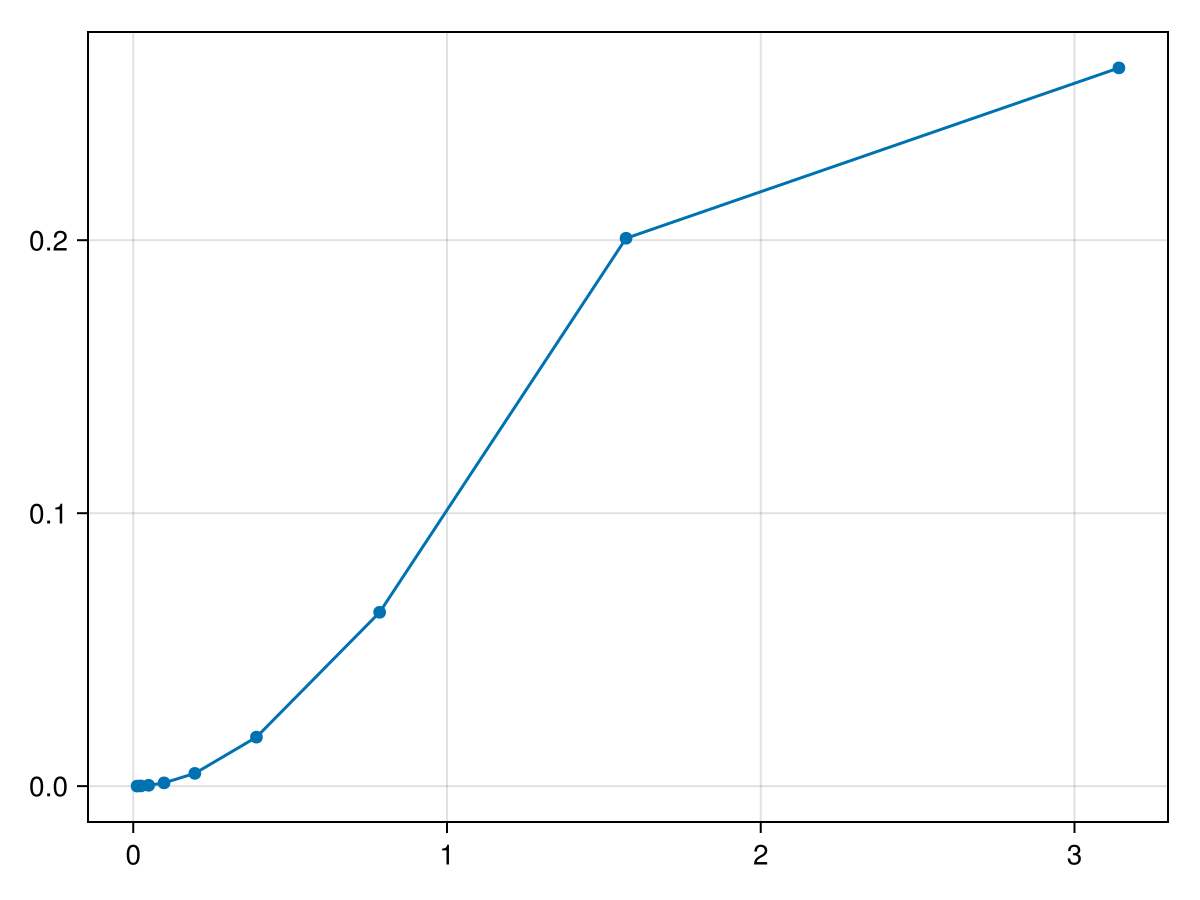

In [195]:
scatterlines(hs, es)

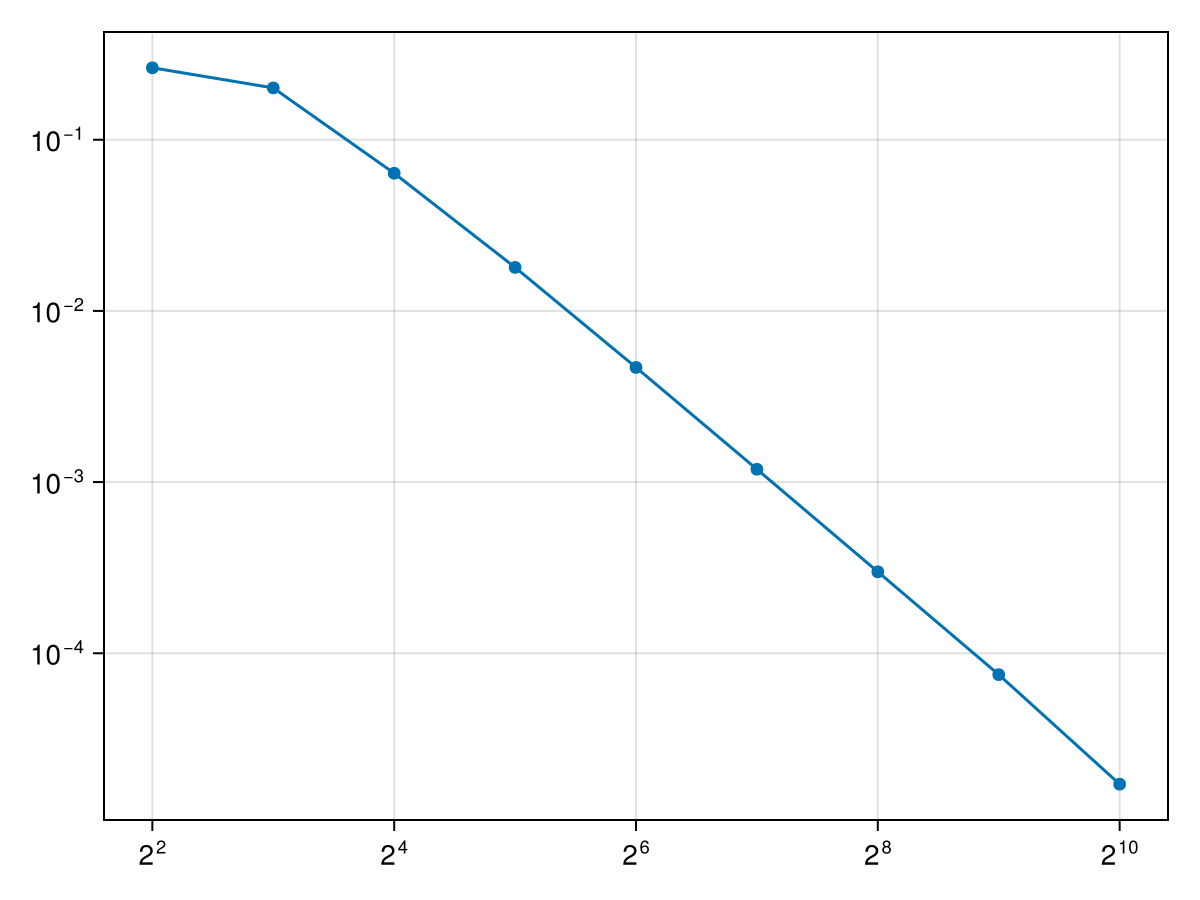

In [196]:
f = Figure()
Axis(f[1,1], xscale=log2, yscale=log10)
scatterlines!(Nes, es)
f

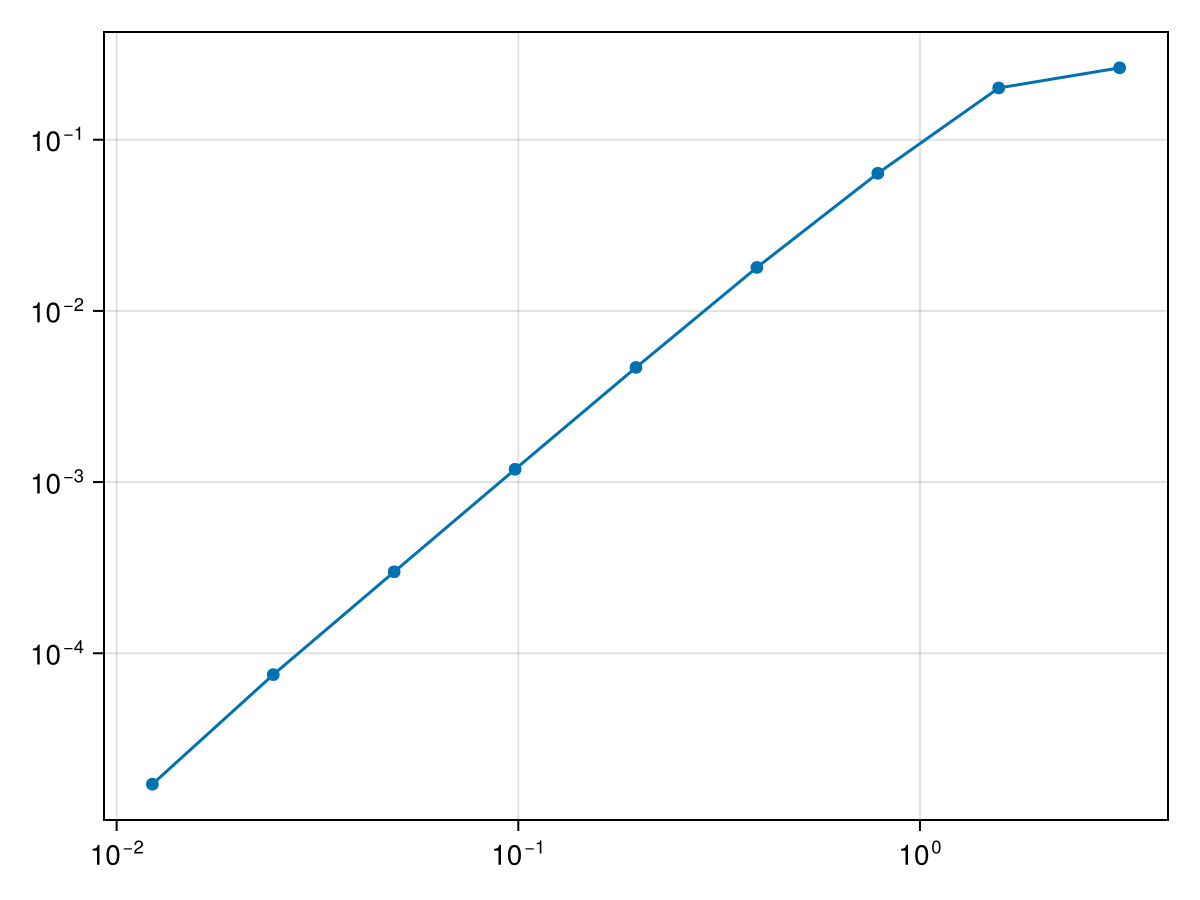

In [197]:
f = Figure()
Axis(f[1,1], xscale=log10, yscale=log10)
scatterlines!(hs, es)
f

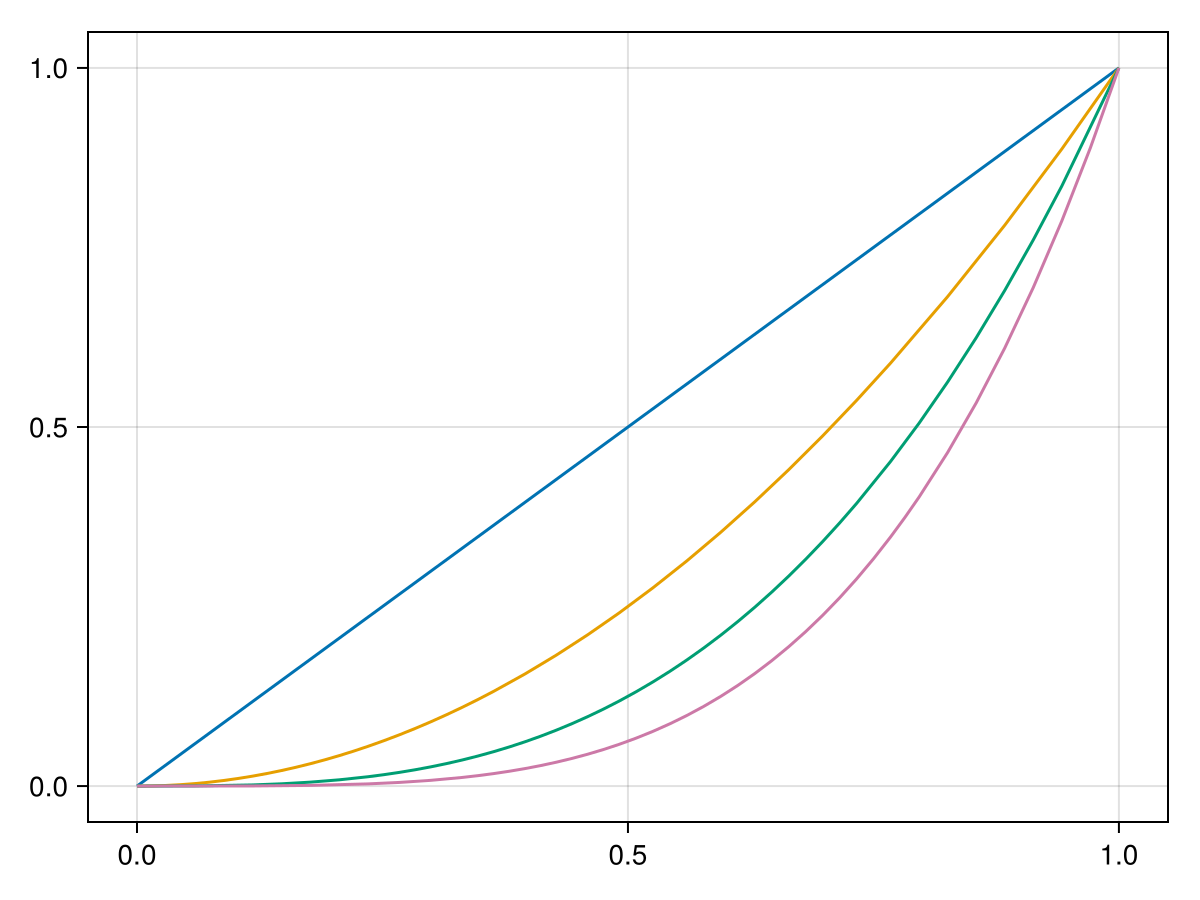

In [209]:
mks = monomials(1:4, 0.0001 .. 1)

fplot(mks...)

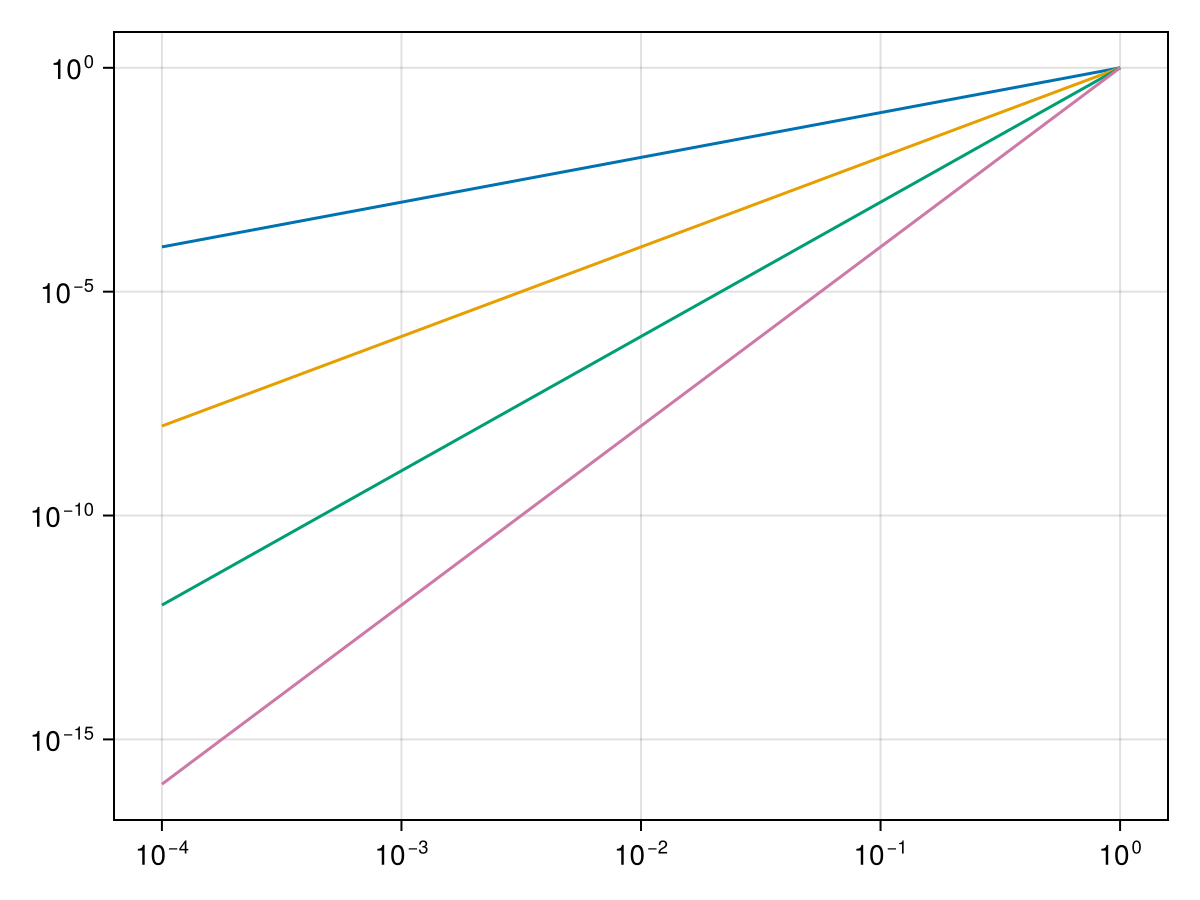

In [210]:
f = Figure()
Axis(f[1,1], xscale=log10, yscale=log10)
fplot!(mks...)
f